In [ ]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [ ]:
def rk4vec( t0, m, u0, dt, f ):
    
    import numpy as np
    
    f0 = f ( t0, m, u0 )
    t1 = t0 + dt / 2.0
    u1 = np.zeros ( m )
    u1[0:m] = u0[0:m] + dt * f0[0:m] / 2.0
    f1 = f ( t1, m, u1 )
    
    t2 = t0 + dt / 2.0
    u2 = np.zeros ( m )
    u2[0:m] = u0[0:m] + dt * f1[0:m] / 2.0
    f2 = f ( t2, m, u2 )
    
    t3 = t0 + dt
    u3 = np.zeros ( m )
    u3[0:m] = u0[0:m] + dt * f2[0:m]
    f3 = f ( t3, m, u3 )
    
    u = np.zeros ( m )
    u[0:m] = u0[0:m] + ( dt / 6.0 ) * ( \
                                       f0[0:m] \
                                       + 2.0 * f1[0:m] \
                                       + 2.0 * f2[0:m] \
                                       +       f3[0:m] )
    return u

In [ ]:
def dodoi(pop=100):
    m = 3   # numero de equaçoes 
    n = 50 # numero de passos temporais
    
    tmin = 0.
    tmax = 100.
    t = np.linspace(tmin,tmax,n)
    dt = t[1] - t[0]
    
    # agora criamos arrays para nossas variaveis
    # u0 para valor inicial, u1 para valor final
    # u0[0] : sucetiveis
    # u0[1] : infectados
    # u0[2] : recuperados
  
    
    sus  = np.zeros([n])
    infec = np.zeros([n])
    rec  = np.zeros([n])
    
    u0 = np.zeros([m])
    u1 = np.zeros_like(u0)
    
    # condicoes iniciais
    u0[0] = 100
    u0[1] = 1
    u0[2] = 0
  
    
    t0 = t[0]
    
    for i in range(n):
        
        # colocamos os valores iniciais nos arrays das variaveis
        
        sus[i]  = u0[0]
        infec[i] = u0[1]
        rec[i]  = u0[2]
        
        # chamamos a rotina rk4vec
        u1 = rk4vec( t[i], m, u0, dt, dodoi_f)
        
        u0 = np.copy(u1)
        
    return sus,infec,rec,t

In [ ]:
# Funcao que tem as equacoes diferenciais

#Lado direiro da equação
def dodoi_f(t,m,u):
    uprime = np.zeros_like(u)
    b = 0.4
    g = 0.2
    pop = 100

    uprime[0] = -(b*u[1]*u[0])/pop
    uprime[1] = ((b*u[1]*u[0])/pop) - g*u[1]
    uprime[2] = g*u[1]
 
    
    return uprime

In [ ]:
sus, infec, rec, t = dodoi(100)

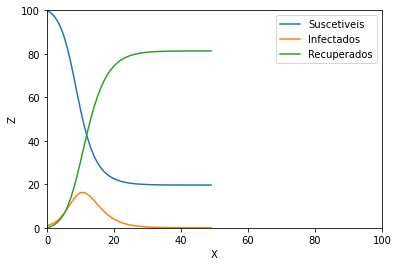

In [ ]:
from IPython import display
import time


plt.xlim(0.,100.)
plt.ylim(0,100)
plt.xlabel('X')
plt.ylabel('Z')
plt.plot(sus,label='Suscetiveis')
plt.plot(infec,label='Infectados')
plt.plot(rec,label='Recuperados')
plt.legend()
